<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

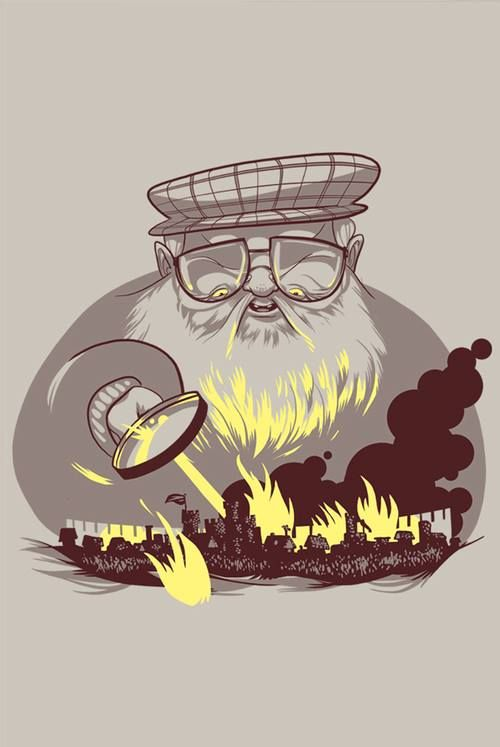

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [81]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: /content/game_of_thrones_test_old.csv
100% 38.3k/38.3k [00:00<00:00, 50.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: /content/game_of_thrones_train_old.csv
100% 141k/141k [00:00<00:00, 83.2MB/s]


In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [84]:
data = pd.read_csv("game_of_thrones_train.csv", index_col='S.No')

In [10]:
data.shape

(1557, 26)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [11]:
# Подсчитаем сумму NaN во всех столбцах
nan_stat = data.isna().sum().reset_index().rename(columns={"index": "column_name", 0: "NaN nums"})
nan_stat["nan_percentage"] = 100*(nan_stat["NaN nums"]/data.shape[0])
# возьмем столбцы где процент NaN значений > 95
high_nan_clmns = nan_stat[nan_stat["nan_percentage"]>95]["column_name"].to_list()

Столбцы в которых NaN значений больше 95% мы их удаляем, так как данные столбцы вносят слишком мало информации.

In [13]:
data.drop(columns=high_nan_clmns, inplace = True)

Если признак категориальный то заменим NaN на no_data. Для boolean значений (которые фактически для нас категориальные) заменим NaN также на no_data, числовые же признаки заменим на медианное значение (предварительно вычислив его на train датасете).

In [17]:
# Заполняем категориальные столбцы значением
for clmn in data.columns:
  if data[clmn].dtype == 'object':
    data[clmn] = data[clmn].fillna('no_data')

In [18]:
# Обработаем пропущенные значения в столбцах где должно быть boolean значения как -1
bool_clmns = ["dateOfBirth", "DateoFdeath", "isAliveSpouse", "age"]

for clmn in bool_clmns:
  data[clmn] = data[clmn].fillna(-1)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [19]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'DateoFdeath',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'popularity', 'isAlive'],
      dtype='object')

In [20]:
# создаем признак isPopular
data["isPopular"] = data["popularity"].apply(lambda x: 0 if x < 0.5 else 1)

In [21]:
# создаем признак boolDeadRelations
data["boolDeadRelations"] = data["numDeadRelations"].apply(lambda x: 0 if x ==0 else 1)

In [23]:
# Упрощаем признак culture
def simplify_culture(original_value):
  cult = {
      'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
      'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
      'Asshai': ["asshai'i", 'asshai'],
      'Lysene': ['lysene', 'lyseni'],
      'Andal': ['andal', 'andals'],
      'Braavosi': ['braavosi', 'braavos'],
      'Dornish': ['dornishmen', 'dorne', 'dornish'],
      'Myrish': ['myr', 'myrish', 'myrmen'],
      'Westermen': ['westermen', 'westerman', 'westerlands'],
      'Westerosi': ['westeros', 'westerosi'],
      'Stormlander': ['stormlands', 'stormlander'],
      'Norvoshi': ['norvos', 'norvoshi'],
      'Northmen': ['the north', 'northmen'],
      'Free Folk': ['wildling', 'first men', 'free folk'],
      'Qartheen': ['qartheen', 'qarth'],
      'Reach': ['the reach', 'reach', 'reachmen'],
  }

  for k,v in cult.items():
    if original_value in v:
      return k
  return original_value

data["culture"] = data["culture"].apply(simplify_culture)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

Дадим формальныое определние того, какие столбцы мы будем выбрасывать:
1. Столбцы у которых более 95% пропущенных значений (были удалены ранее)
2. Столбцы в которых слишком высокая вариативность уникальных значений. Т.е. это своего рода IDшники или столбцы в которых кол-во уникальных значений почти что равно кол-ву строк.
3. Столбцы которые коррелируют друг с другом (например возраст и дата рождения при условии что мы знаем текущую дату).

---



In [25]:
# Выведем % уникальных значений от их общего числа для каждого из столбцов
unique_value_stats = data.nunique().reset_index().rename(columns={"index": "column_name", 0: "Nums unique value"})
unique_value_stats["Unique percentage"] = (unique_value_stats["Nums unique value"]/data.shape[0])*100
# получаем список столбцов в которых уникальных значений больше половины (более 90%)
clmns_unique  = unique_value_stats[unique_value_stats["Unique percentage"]>90]["column_name"].to_list()
data.drop(columns=clmns_unique, inplace = True)

['name']


In [27]:
# Посмотрим на корреляцию числовых признаков друг с другом
numeric_clmns = []
for clmn in data.columns:
  if data[clmn].dtype != "object":
    numeric_clmns.append(clmn)

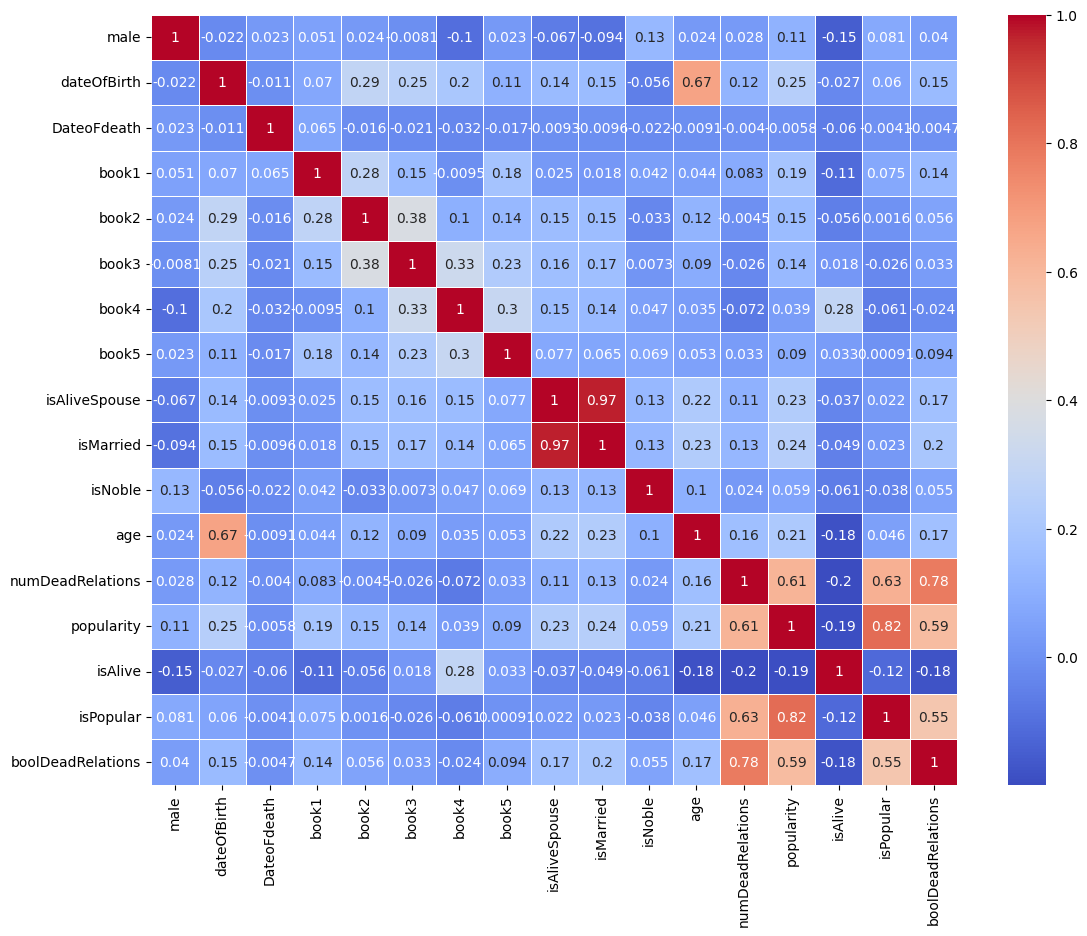

In [28]:
corr_matrix = data[numeric_clmns].corr()
plt.figure(figsize=(13, 10))  # Настроим размер графика
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Сильно скоррелированными признаками будем считать те, для которых значение коэффициента корреляции больше 0.7 или меньше -0.7.

In [29]:
corr_pairs = corr_matrix.unstack()
strong_pairs = corr_pairs[(abs(corr_pairs) > 0.7) & (corr_pairs != 1.0)]
strong_pairs = strong_pairs.drop_duplicates()

strong_pairs.reset_index().rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "corr_coeff"})

,feature_1,feature_2,corr_coeff
0,isAliveSpouse,isMarried,0.971557
1,numDeadRelations,boolDeadRelations,0.781579
2,popularity,isPopular,0.820775


Удалим одну из коррелируемых фичей по следующей логике:
1. Простота интерпретации. Те понятно по смыслу что именно дает данная фича
2. Кол-во пропусков в данных, если в фиче их было меньше, то такую фичу оставляем с большей вероятностью

In [30]:
# Фичи которые удаляем
to_delete_features = ["isAliveSpouse", "numDeadRelations", "popularity"]
data.drop(columns=to_delete_features, inplace = True)

Также у нас есть две фичи, которые явно коррелируют друг с другом, "age" и "dateOfBirth" так как мы знаем с какой даты ведется отсчет, поэтому мы всегда можем вычислить возраст, следовательно удаляем фичу, которая имеет больше пропусков.

In [31]:
print(f'Percentage missed values for age: {int(100*data[data["age"]==-1].shape[0]/data.shape[0])}')
print(f'Percentage missed values for dateOfBirth: {int(100*data[data["dateOfBirth"]==-1].shape[0]/data.shape[0])}')

Percentage missed values for age: 82
Percentage missed values for dateOfBirth: 82


Данные фичи абсолютно одинково заполнены, поэтому далим фичу dateOfBirth так как фича age более легко интерпретируема

In [32]:
data.drop(columns=["dateOfBirth"], inplace = True)

In [33]:
# Посмотрим на кол-во уникальных значений для каждого из столбцов
data.nunique()

,0
title,196
male,2
culture,49
DateoFdeath,62
house,316
spouse,187
book1,2
book2,2
book3,2
book4,2


Заметим что столбцы title, house и spouse содержат очень много уникальных значений, так как при этом это еще и категориальне признаки то необходимо их предобработать.

In [45]:
# Упростим колонку title, создав новый столбец simplified_title, а затем удалим исходную колонку title
def get_simpliefied_title(title):
  simplified_titles = set(["no_data", "lord", "prince", "lady", "king",
                           "master", "queen", "ser", "maester", "septon",
                           "winterfell", "septa", "cupbearer", "wisdom",
                           "khal"])
  words = title.lower().split()
  for word in words:
    for smplf in simplified_titles:
      if smplf in word:
        return smplf
  return "rare_title"

data["simplified_title"] = data["title"].apply(get_simpliefied_title)

data.drop(columns=["title"], inplace=True)

In [46]:
# Если у нас есть дата смерти, то очевидно что герой мертв, поэтому сделаем бинарный признак
data["isDateOfDeath"] = data["DateoFdeath"].apply(lambda x: 1 if x!=-1 else 0)

# Удалим столбец DateoFdeath
data.drop(columns=["DateoFdeath"], inplace=True)

In [56]:
# Столбцы spuse и isMarried коррелируют друг друга, фактически столбец spouse можно удалить
data.drop(columns=["spouse"], inplace=True)

In [57]:
# Упрощаем фичу house
house_cnt = data["house"].value_counts().reset_index()
house_cnt["count"].value_counts()

house_1 = house_cnt[house_cnt["count"]==1]["house"].to_list()
house_2 = house_cnt[house_cnt["count"]==2]["house"].to_list()
house_3 = house_cnt[house_cnt["count"]==3]["house"].to_list()
house_4 = house_cnt[house_cnt["count"]==4]["house"].to_list()
house_5 = house_cnt[house_cnt["count"]==5]["house"].to_list()
house_6 = house_cnt[house_cnt["count"]==6]["house"].to_list()
house_8 = house_cnt[house_cnt["count"]==8]["house"].to_list()
house_7 = house_cnt[house_cnt["count"]==7]["house"].to_list()

def house_smplf(raw):
  if raw in house_1:
    return "house_1"
  elif raw in house_2:
    return "house_2"
  elif raw in house_3:
    return "house_3"
  elif raw in house_4:
    return "house_4"
  elif raw in house_5:
    return "house_5"
  elif raw in house_6:
    return "house_6"
  elif raw in house_7:
    return "house_7"
  elif raw == "no_data":
    return "no_data"
  else:
    return "rare_house"


data["house_smplf"] = data["house"].apply(house_smplf)

In [59]:
# удалим столбец house
data.drop(columns=["house"], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

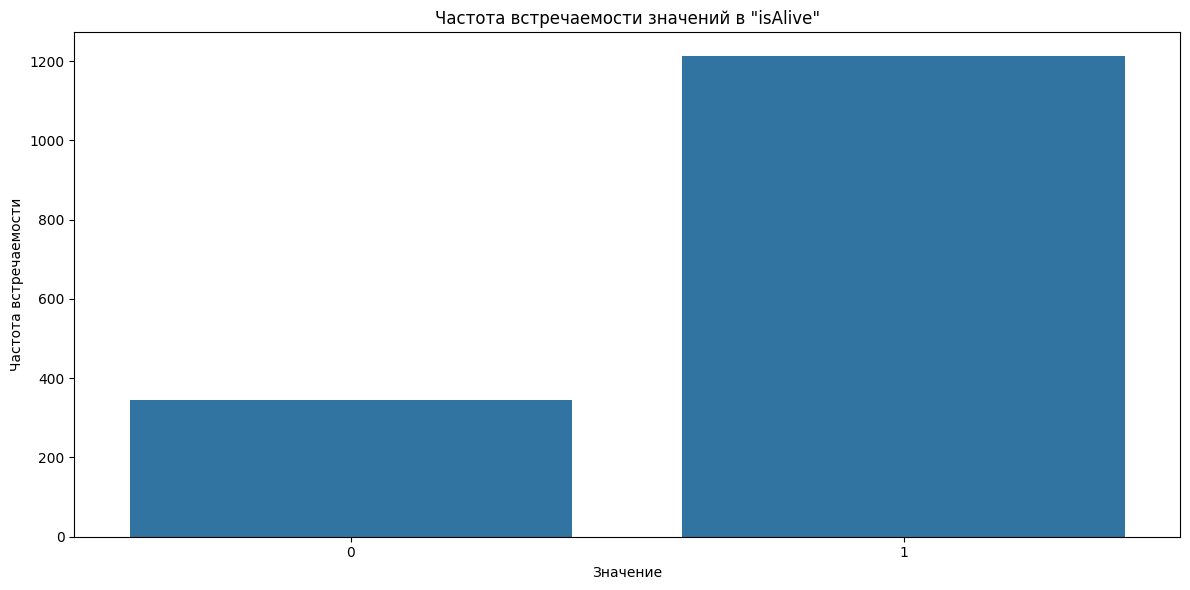

In [60]:
data["isAlive"].value_counts(dropna=False)


target_counts = data["isAlive"].value_counts()
target_counts_df = target_counts.reset_index()
target_counts_df.columns = ['Value', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Value', y='Count', data=target_counts_df)

plt.xlabel('Значение')
plt.ylabel('Частота встречаемости')
plt.title('Частота встречаемости значений в "isAlive"')

plt.tight_layout()
plt.show()

На графике видно, что в распределении целевой переменной наблюдается несбалансированность. Поэтому лучше использовать метрики, которые позволяют учитывать дисбаланс классов.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   culture            1557 non-null   object 
 2   book1              1557 non-null   int64  
 3   book2              1557 non-null   int64  
 4   book3              1557 non-null   int64  
 5   book4              1557 non-null   int64  
 6   book5              1557 non-null   int64  
 7   isMarried          1557 non-null   int64  
 8   isNoble            1557 non-null   int64  
 9   age                1557 non-null   float64
 10  isAlive            1557 non-null   int64  
 11  isPopular          1557 non-null   int64  
 12  boolDeadRelations  1557 non-null   int64  
 13  simplified_title   1557 non-null   object 
 14  isDateOfDeath      1557 non-null   int64  
 15  house_smplf        1557 non-null   object 
dtypes: float64(1), int64(12), obj

In [62]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [63]:
# У нас осталось только 3 столбца с категориальными признаками
cat_values = ["culture", "simplified_title", "house_smplf"]

# Признаки будем кодировать с помощью OneHotEncoder
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat_values, handle_unknown='error', use_cat_names=True)
train_encoded = encoder.fit_transform(data)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [64]:
corr_matrix = train_encoded.corr()


corr_pairs = corr_matrix.unstack()
strong_pairs = corr_pairs[(abs(corr_pairs) > 0.7) & (corr_pairs != 1.0)]
strong_pairs = strong_pairs.drop_duplicates()

strong_pairs.reset_index().rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "corr_coeff"})

,feature_1,feature_2,corr_coeff
0,culture_Dothraki,simplified_title_khal,0.725724
1,isNoble,simplified_title_no_data,-0.958078
2,isAlive,isDateOfDeath,-0.928872


Из данной корреляции мы можем сделать следующий вывод:
1. Что все герои дома Stone Crows принадлежат к Value mountain clans
2. Если у героя есть какой-то статус, то тогда у него он (статус) будет всегда заполнен
3. Очевидно что если у героя есть дата смерти то он не может быть живым

По поводу последнего пункта, мы можем сделать следующее. Если у нового оъекта поле isDateOfDeath не пустое, тогда мы сразу ставим таргет как isAlive = False.

Удалим столбцы: "house_smplf_Stone Crows"	и "isNoble".

In [65]:
train_encoded.drop(columns=["isNoble"], inplace=True)

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

data = pd.read_csv("game_of_thrones_train.csv", index_col='S.No')
# Создадим единый пайплайн получения фичей из сырых данных до состояния обучения модели

# 1. Удаляем столбцы в которых высокий процен пропусков
high_nan_clmns = ['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir']
data.drop(columns=high_nan_clmns, inplace = True)

# 2. Заполняем категориальные пропуски в категориальных фичах
for clmn in ['name', 'title', 'culture', 'house', 'spouse']:
  data[clmn].fillna('no_data', inplace=True)

# 3. Заполняем пропуски в числовых колонках
for clmn in ["dateOfBirth", "DateoFdeath", "isAliveSpouse", "age"]:
  data[clmn].fillna(-1, inplace=True)

# 4. Создаем признак isPopular
data["isPopular"] = data["popularity"].apply(lambda x: 0 if x < 0.5 else 1)

# 5. Создаем признак boolDeadRelations
data["boolDeadRelations"] = data["numDeadRelations"].apply(lambda x: 0 if x ==0 else 1)

# 6. Упрощаем признак culture
def simplify_culture(original_value):
  cult = {
      'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
      'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
      'Asshai': ["asshai'i", 'asshai'],
      'Lysene': ['lysene', 'lyseni'],
      'Andal': ['andal', 'andals'],
      'Braavosi': ['braavosi', 'braavos'],
      'Dornish': ['dornishmen', 'dorne', 'dornish'],
      'Myrish': ['myr', 'myrish', 'myrmen'],
      'Westermen': ['westermen', 'westerman', 'westerlands'],
      'Westerosi': ['westeros', 'westerosi'],
      'Stormlander': ['stormlands', 'stormlander'],
      'Norvoshi': ['norvos', 'norvoshi'],
      'Northmen': ['the north', 'northmen'],
      'Free Folk': ['wildling', 'first men', 'free folk'],
      'Qartheen': ['qartheen', 'qarth'],
      'Reach': ['the reach', 'reach', 'reachmen'],
  }

  for k,v in cult.items():
    if original_value in v:
      return k
  return original_value

data["culture"] = data["culture"].apply(simplify_culture)

# 7. Удалим ряд столбцов
to_delete_features = ["name", "isAliveSpouse", "numDeadRelations", "popularity",
                      "dateOfBirth", "spouse", "isNoble"]
data.drop(columns=to_delete_features, inplace = True)

# 8. Упростим колонку title, создав новый столбец simplified_title, а затем удалим исходную колонку title
def get_simpliefied_title(original_title):
  simplified_titles = set(["no_data", "lord", "prince", "lady", "king",
                           "master", "queen", "ser", "maester", "septon",
                           "winterfell", "septa", "cupbearer", "wisdom",
                           "khal"])
  words = original_title.lower().split()
  for word in words:
    for smplf in simplified_titles:
      if smplf in word:
        return smplf
  return "rare_title"

data["simplified_title"] = data["title"].apply(lambda x: get_simpliefied_title(x))
data.drop(columns=["title"], inplace=True)

# 9. Если у нас есть дата смерти, то очевидно что герой мертв, поэтому сделаем бинарный признак и удалим столбец DateoFdeath
data["isDateOfDeath"] = data["DateoFdeath"].apply(lambda x: 1 if x!=-1 else 0)
data.drop(columns=["DateoFdeath"], inplace=True)


# 10. Упростим колонку house, создадим новую колонку house_smplf, после чего удалим столбец house
house_cnt = data["house"].value_counts().reset_index()
house_cnt["count"].value_counts()

house_1 = house_cnt[house_cnt["count"]==1]["house"].to_list()
house_2 = house_cnt[house_cnt["count"]==2]["house"].to_list()
house_3 = house_cnt[house_cnt["count"]==3]["house"].to_list()
house_4 = house_cnt[house_cnt["count"]==4]["house"].to_list()
house_5 = house_cnt[house_cnt["count"]==5]["house"].to_list()
house_6 = house_cnt[house_cnt["count"]==6]["house"].to_list()
house_8 = house_cnt[house_cnt["count"]==8]["house"].to_list()
house_7 = house_cnt[house_cnt["count"]==7]["house"].to_list()

def house_smplf(raw):
  if raw in house_1:
    return "house_1"
  elif raw in house_2:
    return "house_2"
  elif raw in house_3:
    return "house_3"
  elif raw in house_4:
    return "house_4"
  elif raw in house_5:
    return "house_5"
  elif raw in house_6:
    return "house_6"
  elif raw in house_7:
    return "house_7"
  elif raw == "no_data":
    return "no_data"
  else:
    return "rare_house"


data["house_smplf"] = data["house"].apply(house_smplf)
data.drop(columns=["house"], inplace=True)

categorical_features = ["culture", "simplified_title", "house_smplf"]
numeric_features = ['male', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'age', 'isPopular', 'boolDeadRelations',
       'isDateOfDeath']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),        # Стандартизация числовых признаков
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)  # OneHotEncoder для категориальных признаков
    ])

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [138]:
y = data["isAlive"]

X = data.drop(columns=["isAlive"])
X = preprocessor.fit_transform(X)

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [139]:
from sklearn.model_selection import train_test_split

# зафиксируем random_state

random_state = 5

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=random_state)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [141]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [142]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [143]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_log_reg = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [144]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()
rnd_forest = RandomForestClassifier()
gauss_process = GaussianProcessClassifier()
gauss_nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
decision_tree = DecisionTreeClassifier()


# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)
rnd_forest.fit(X_train, y_train)
gauss_process.fit(X_train, y_train)
gauss_nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada_boost = ada_boost.predict(X_test)
y_pred_rnd_forest = rnd_forest.predict(X_test)
y_pred_gauss_process = gauss_process.predict(X_test)
y_pred_gauss_nb = gauss_nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей



```
# Выбран кодовый формат
```

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [145]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [146]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.5f" % accuracy)

Accuracy : 0.99679


In [147]:
# Шаг 3. Предсказание на тестовых данных
accuracy_ada_boost = accuracy_score(y_test, y_pred_ada_boost)
accuracy_rnd_forest = accuracy_score(y_test, y_pred_rnd_forest)
accuracy_gauss_process = accuracy_score(y_test, y_pred_gauss_process)
accuracy_gauss_nb = accuracy_score(y_test, y_pred_gauss_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy ada_boost: %.5f" % accuracy_ada_boost)
print("Accuracy rnd_forest: %.5f" % accuracy_rnd_forest)
print("Accuracy gauss_process: %.5f" % accuracy_gauss_process)
print("Accuracy gauss_nb: %.5f" % accuracy_gauss_nb)
print("Accuracy knn: %.5f" % accuracy_knn)
print("Accuracy svc: %.5f" % accuracy_svc)
print("Accuracy tree: %.5f" % accuracy_decision_tree)

Accuracy ada_boost: 0.99679
Accuracy rnd_forest: 0.99359
Accuracy gauss_process: 0.99038
Accuracy gauss_nb: 0.30449
Accuracy knn: 0.98718
Accuracy svc: 0.99359
Accuracy tree: 0.99679


По метрике Accuracy две модели показали идентичный результат. Это модели Adaboost и LogisticRegression.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [77]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.39MB/s]


In [148]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [155]:
submission["isAlive"].value_counts()

,count
isAlive,
0,389


In [151]:
# Загружаем тестовый датасет для которого мы должны сделать предсказание
test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

Ниже произведем всю туже самую последовательность предобработки столбцов, только уже без анализа, после чего сделаем предикт с помощью бустинговой модели (Adaboost).

In [152]:
# 1. Удаляем столбцы в которых высокий процен пропусков
test.drop(columns=high_nan_clmns, inplace = True)

# 2. Заполняем категориальные пропуски в категориальных фичах
for clmn in ['name', 'title', 'culture', 'house', 'spouse']:
  test[clmn].fillna('no_data', inplace=True)

# 3. Заполняем пропуски в числовых колонках
for clmn in ["dateOfBirth", "DateoFdeath", "isAliveSpouse", "age"]:
  test[clmn].fillna(-1, inplace=True)

# 4. Создаем признак isPopular
test["isPopular"] = test["popularity"].apply(lambda x: 0 if x < 0.5 else 1)

# 5. Создаем признак boolDeadRelations
test["boolDeadRelations"] = test["numDeadRelations"].apply(lambda x: 0 if x ==0 else 1)

# 6. Упрощаем признак culture
test["culture"] = test["culture"].apply(simplify_culture)

# 7. Удалим ряд столбцов
test.drop(columns=to_delete_features, inplace = True)

# 8. Упростим колонку title, создав новый столбец simplified_title, а затем удалим исходную колонку title
test["simplified_title"] = test["title"].apply(lambda x: get_simpliefied_title(x))
test.drop(columns=["title"], inplace=True)

# 9. Если у нас есть дата смерти, то очевидно что герой мертв, поэтому сделаем бинарный признак и удалим столбец DateoFdeath
test["isDateOfDeath"] = test["DateoFdeath"].apply(lambda x: 1 if x!=-1 else 0)
test.drop(columns=["DateoFdeath"], inplace=True)


# 10. Упростим колонку house, создадим новую колонку house_smplf, после чего удалим столбец house
test["house_smplf"] = test["house"].apply(house_smplf)
test.drop(columns=["house"], inplace=True)

In [156]:
X_test_transformed = preprocessor.transform(test)

In [157]:
y_test_predicted = ada_boost.predict(X_test_transformed)

In [159]:
submission["isAlive"] = y_test_predicted

Сохраняем полученные результаты в файл:

In [160]:
submission.to_csv("/content/my_submission.csv", index=False)